# Controller Design
### PID Controller
The general form of a PID controller output (u) is given by:  
<img src="notebook_imgs/pid_controller_fun.png" alt="Example Image" width="400"/>  

### Example#1: Longitudinal Trajectory
Longitudinal trajectory control in the context of, for example, an autonomous vehicle, refers to controlling the vehicle's speed along its path.  
Let's assume you have a desired speed profile v_d(t) and the current vehicle speed v(t). The error signal for longitudinal control ((t)) is the difference between the desired speed and the actual speed:  
<img src="notebook_imgs/long_ctrl.png" alt="Example Image" width="180"/>  
### Example#2: Lateral Trajectory
Lateral trajectory control involves controlling the lateral position of a vehicle relative to a desired path.  
Let's assume you have a desired lateral position y_d(t) and the current lateral position y(t). The error signal for lateral control (e_y(t)) is the difference between the desired lateral position and the actual lateral position:  
<img src="notebook_imgs/lat_ctrl.png" alt="Example Image" width="160"/>

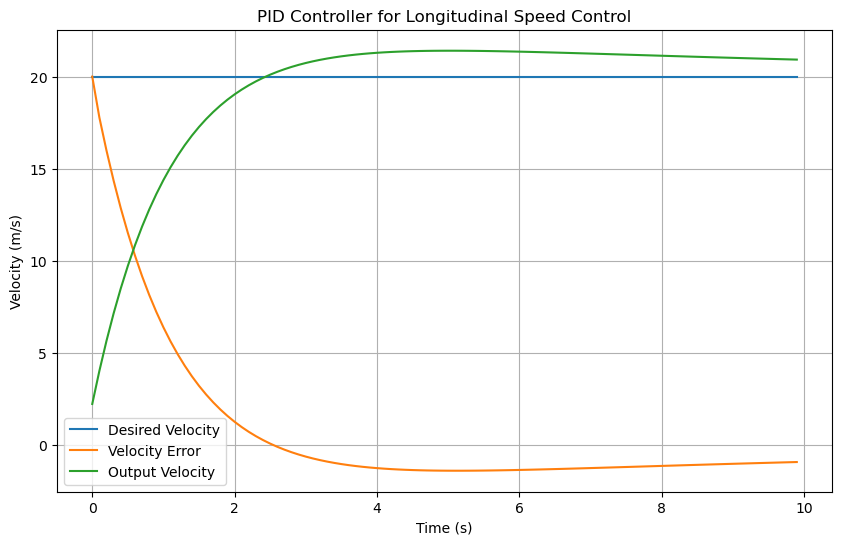

In [4]:
import matplotlib.pyplot as plt

class PIDController:
    def __init__(self, Kp, Ki, Kd):
        self.Kp = Kp
        self.Ki = Ki
        self.Kd = Kd
        self.prev_error = 0
        self.integral = 0

    def compute(self, error, dt):
        # integral(t) = integral(t+1) + error(t) x dt
        self.integral += error * dt
        # derivative(t) = ( error(t) - error(t-1) ) / dt
        derivative = (error - self.prev_error) / dt
        # Output(t) = Proportional(t) + Integral(t) + Derivative(t)
        output = self.Kp * error + self.Ki * self.integral + self.Kd * derivative
        self.prev_error = error
        return output

# Example of longitudinal trajectory control using PID
desired_speed = 20  # m/s
current_speed = 0   # Initial speed
dt = 0.1             # Time step
total_time = 10      # Total simulation time

pid_controller = PIDController(Kp=1, Ki=0.1, Kd=0.01)

time_steps = int(total_time / dt)
time = [i * dt for i in range(time_steps)]
velocity_input = []
velocity_error = []
velocity_output = []

for _ in range(time_steps):
    speed_error = desired_speed - current_speed
    acceleration = pid_controller.compute(speed_error, dt)
    current_speed += acceleration * dt

    velocity_input.append(desired_speed)
    velocity_error.append(speed_error)
    velocity_output.append(current_speed)

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(time, velocity_input, label='Desired Velocity')
plt.plot(time, velocity_error, label='Velocity Error')
plt.plot(time, velocity_output, label='Output Velocity')
plt.xlabel('Time (s)')
plt.ylabel('Velocity (m/s)')
plt.title('PID Controller for Longitudinal Speed Control')
plt.legend()
plt.grid(True)
plt.show()